In [1]:
import numpy as np
import jax.numpy as jnp
from jax import grad, hessian
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
%matplotlib widget  
%load_ext autoreload
%autoreload 2
%config InlineBackend.figure_format = 'retina'

In [3]:
# Optimizer algorithm
from Optimizer.VanillaGD import gd  # Gradient Descent
from Optimizer.AdaptiveGD import agd # Adaptive Steplength GD
from Optimizer.NormalizedGD import ngd  # Normalized GD
from Optimizer.AdaGD import adagrad  # ADAGRAD
from Optimizer.RMSPROP import rmsprop  # RMSPROP
from Optimizer.Adam import adam  # Adam
from Optimizer.Newton import newton  # Newton
from Optimizer.NewtonPinv import newtonpinv  # Newton with PINV
from Optimizer.Momentum import momentum  # Momentum

In [4]:
# Test Functions
from TestFunction.Functions import rastrigin, ackley, sphere

# Rastrigin function

The Rastrigin function ia s non-convexe function, probosed by Rastrigin in 1974. It is has multiple local minima and maxima, with a global minimum at 0. The n-dimensional function is defined by:

$$f(\mathbf{x})=An + \sum_{i=1}^{n}\left[x_i^2 - Acos(2\pi x_i)\right]$$

We can vizualize the 2D version bellow.


In [5]:
rastgrad = grad(rastrigin)
rasthess = hessian(rastrigin)

In [6]:
xx = np.linspace(-15, 15, 1000)
yy = np.linspace(-15, 15, 1000)
X, Y = np.meshgrid(xx, yy)
Z = rastrigin(jnp.stack([X, Y]))
Z = Z.reshape(X.shape)

Platform 'METAL' is experimental and not all JAX functionality may be correctly supported!


Metal device set to: Apple M3 Pro

systemMemory: 18.00 GB
maxCacheSize: 6.00 GB



W0000 00:00:1717758137.418106  158866 mps_client.cc:510] WARNING: JAX Apple GPU support is experimental and not all JAX functionality is correctly supported!
I0000 00:00:1717758137.427576  158866 service.cc:145] XLA service 0x111a90c10 initialized for platform METAL (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1717758137.427589  158866 service.cc:153]   StreamExecutor device (0): Metal, <undefined>
I0000 00:00:1717758137.430940  158866 mps_client.cc:406] Using Simple allocator.
I0000 00:00:1717758137.430958  158866 mps_client.cc:384] XLA backend will use up to 12883132416 bytes on device 0 for SimpleAllocator.


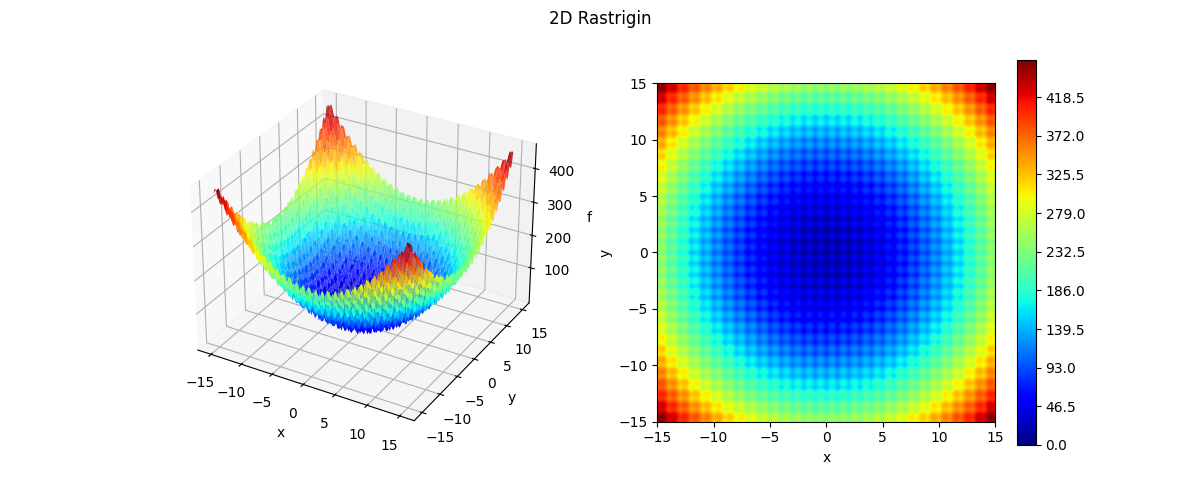

In [7]:
fig = plt.figure(figsize=(12, 5))
ax1 = fig.add_subplot(121, projection='3d')
ax1.plot_surface(X, Y, Z, cmap='jet', alpha=0.8)
ax1.set_xlabel('x')
ax1.set_ylabel('y')
ax1.set_zlabel('f')

# Plot the contour
ax2 = fig.add_subplot(122)
cpf2 = ax2.contourf(X, Y, Z, levels=1000, cmap='jet')
plt.colorbar(cpf2)
ax2.set_xlabel('x')
ax2.set_ylabel('y')

# ax1.set_aspect('equal')
ax2.set_aspect('equal')
plt.suptitle('2D Rastrigin')
plt.show()

In [8]:
x0 = 2 * np.random.normal(0, 1, size=2)
it = 100
hist_grad = gd(rastrigin, rastgrad, x0.copy(), it, 0.001)
hist_agrad = agd(rastrigin, rastgrad, x0.copy(), it, 0.001)
hist_mom = momentum(rastrigin, rastgrad, x0.copy(), it, 0.01)
hist_ngrad = ngd(rastrigin, rastgrad, x0.copy(), it, 0.01)
hist_adam = adam(rastrigin, rastgrad, x0.copy(), it, 0.01)
hist_adagrad = adagrad(rastrigin, rastgrad, x0.copy(), it, 0.01)
hist_rmsprop = rmsprop(rastrigin, rastgrad, x0.copy(), it, 0.01)
hist_newt = newton(rastrigin, rastgrad, rasthess, x0.copy(), it // 2)
hist_newtpinv = newtonpinv(rastrigin, rastgrad, rasthess, x0.copy(), (it-10) // 2)

Vanilla GD:   0%|          | 0/100 [00:00<?, ?it/s]

Adaptive GD:   0%|          | 0/100 [00:00<?, ?it/s]

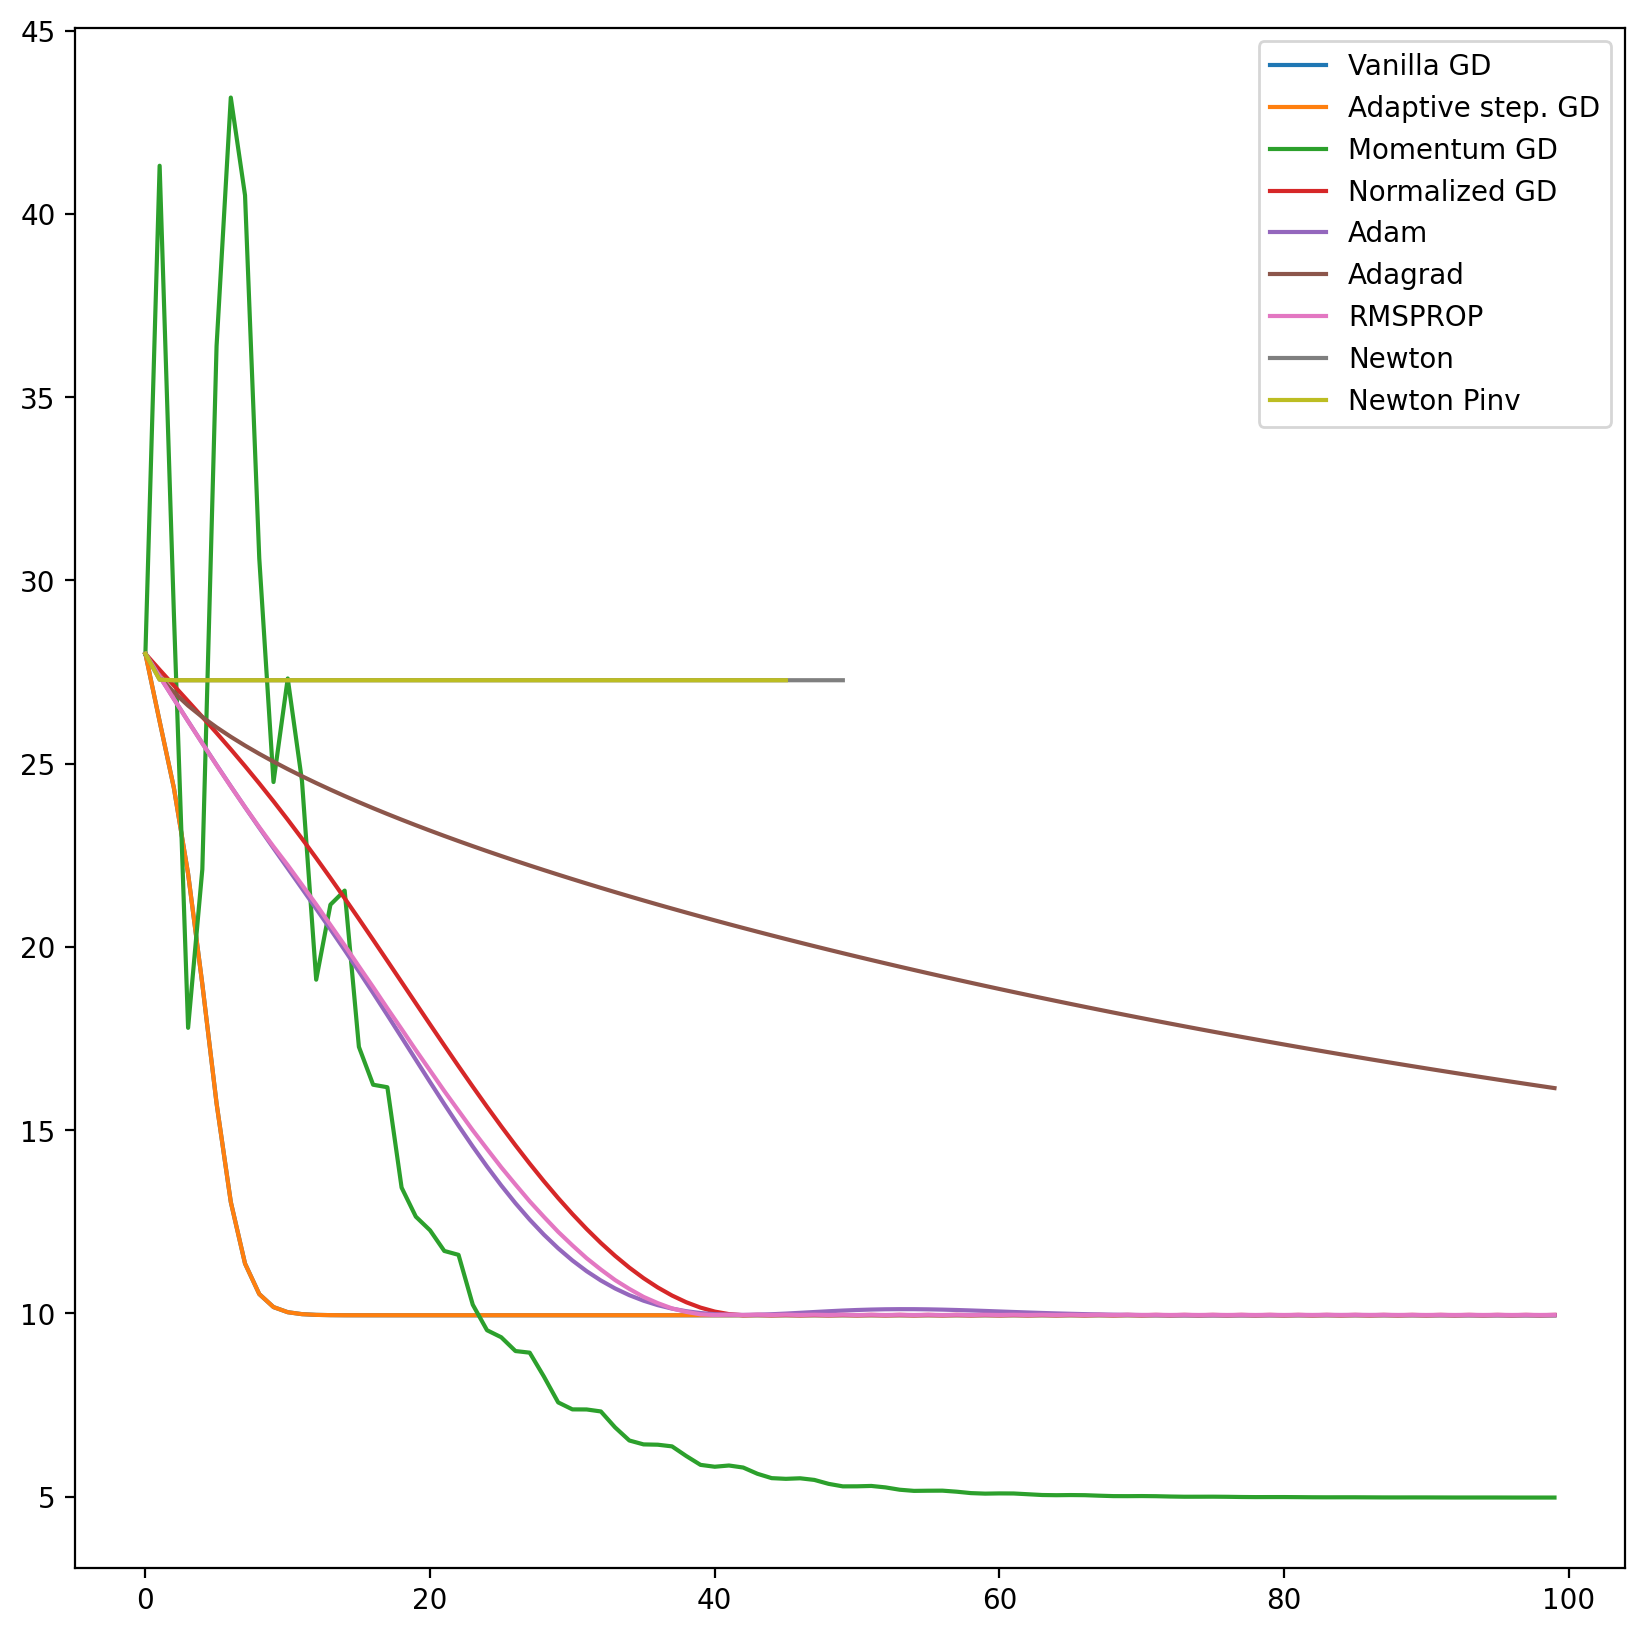

In [ ]:
maxi = max(jnp.abs(x0)) + 1
xx = np.linspace(-maxi, maxi, 500)
yy = np.linspace(-maxi, maxi, 500)
X, Y = np.meshgrid(xx, yy)
Z = rastrigin(jnp.stack([X, Y]))
Z = Z.reshape(X.shape)

fig = plt.figure(figsize=(10, 10))
ax1 = fig.add_subplot(111)
ax1.plot(hist_grad['loss'], '-', label="Vanilla GD")
ax1.plot(hist_agrad['loss'], '-', label="Adaptive step. GD")
ax1.plot(hist_mom['loss'], '-', label="Momentum GD")
ax1.plot(hist_ngrad['loss'], '-', label="Normalized GD")
ax1.plot(hist_adam['loss'], '-', label="Adam")
ax1.plot(hist_adagrad['loss'], '-', label="Adagrad")
ax1.plot(hist_rmsprop['loss'], '-', label="RMSPROP")
ax1.plot(hist_newt['loss'], '-', label="Newton")
ax1.plot(hist_newtpinv['loss'], '-', label="Newton Pinv")
ax1.legend()
plt.show()

All of those optimization algorithm will fill to find these global minima of the Rastrigin function, if they are not initialized near to that points, because all of them are a local optimization algorithm. 

* The  Newton's methode is the first one who conveges, but depending on initial starting points it will get stuck on a local maxima, or a saddles points.
* The vanilla gradient descent is the second one to converge in a local mimima, followed by other functions.
* The adaptive steplengs need more parameter tunning to be efficients
* We can also observe that, the Momentum GD have a tendencie to take  another direction to finds local minima.

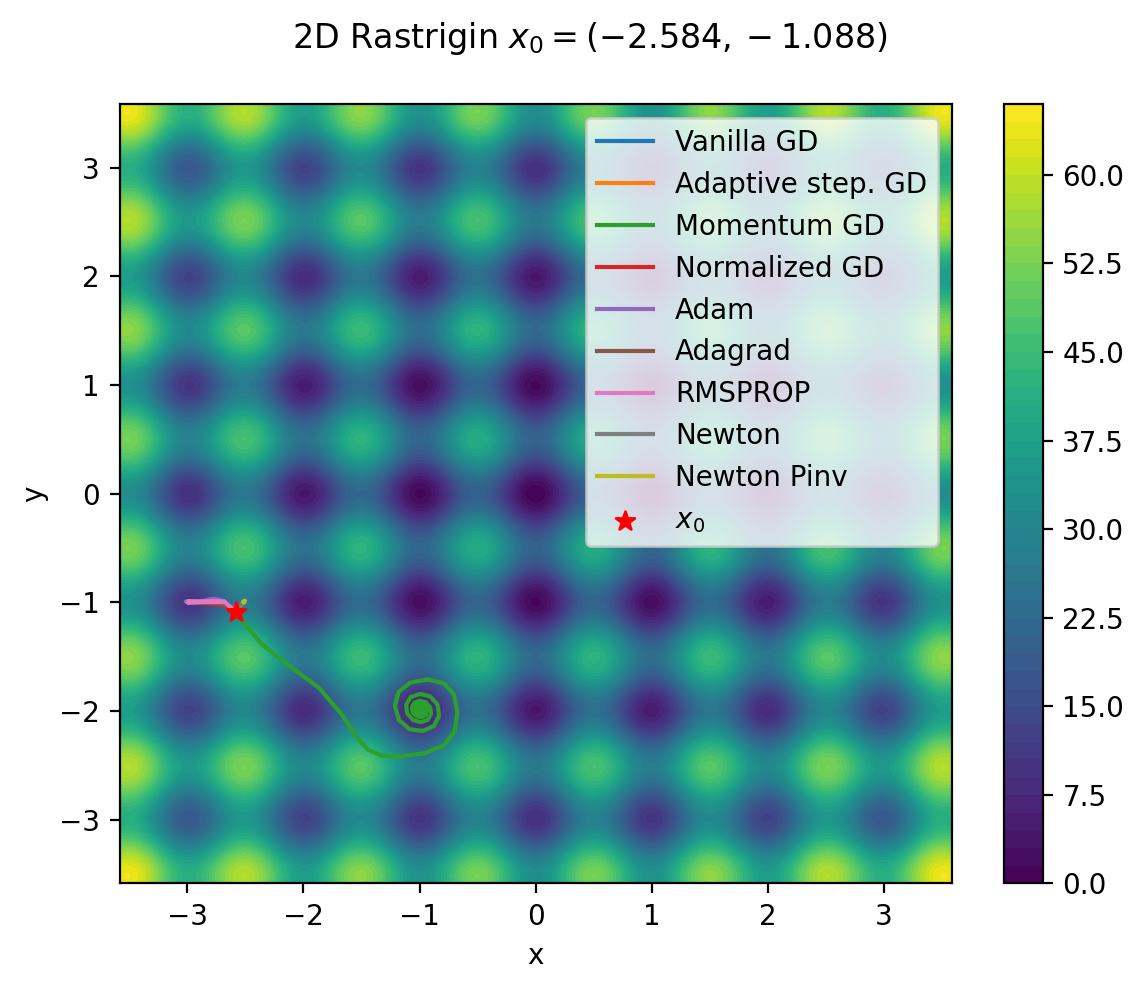

In [ ]:
fig = plt.figure(figsize=(6, 5))
ax2 = fig.add_subplot(111)
cpf2 = ax2.contourf(X, Y, Z, levels=50)
plt.colorbar(cpf2)

line_1, = ax2.plot(hist_grad['weights'][:, 0], hist_grad['weights'][:, 1], '-', label="Vanilla GD")
line_2, = ax2.plot(hist_agrad['weights'][:, 0], hist_agrad['weights'][:, 1], '-', label="Adaptive step. GD")
line_3, = ax2.plot(hist_mom['weights'][:, 0], hist_mom['weights'][:, 1], '-', label="Momentum GD")
line_4, = ax2.plot(hist_ngrad['weights'][:, 0], hist_ngrad['weights'][:, 1], '-', label="Normalized GD")
line_5, = ax2.plot(hist_adam['weights'][:, 0], hist_adam['weights'][:, 1], '-', label="Adam")
line_6, = ax2.plot(hist_adagrad['weights'][:, 0], hist_adagrad['weights'][:, 1], '-', label="Adagrad")
line_7, = ax2.plot(hist_rmsprop['weights'][:, 0], hist_rmsprop['weights'][:, 1], '-', label="RMSPROP")
line_8, = ax2.plot(hist_newt['weights'][:, 0], hist_newt['weights'][:, 1], '-', label="Newton")
line_9, = ax2.plot(hist_newtpinv['weights'][:, 0], hist_newtpinv['weights'][:, 1], '-', label="Newton Pinv")

plt.scatter(x0[0], x0[1], marker='*', color='red', s=50, label='$x_0$', zorder=5)
ax2.set_xlabel('x')
ax2.set_ylabel('y')
# plt.subplots_adjust(left=0.5)
plt.suptitle(f'2D Rastrigin $x_0 = ({x0[0]:.3f}, {x0[1]:.3f})$')
ax2.legend()

def update(frame):
    line_1.set_data(hist_grad['weights'][:frame, 0], hist_grad['weights'][:frame, 1])
    line_2.set_data(hist_agrad['weights'][:frame, 0], hist_agrad['weights'][:frame, 1])
    line_3.set_data(hist_mom['weights'][:frame, 0], hist_mom['weights'][:frame, 1])
    line_4.set_data(hist_ngrad['weights'][:frame, 0], hist_ngrad['weights'][:frame, 1])
    line_5.set_data(hist_adam['weights'][:frame, 0], hist_adam['weights'][:frame, 1])
    line_6.set_data(hist_adagrad['weights'][:frame, 0], hist_adagrad['weights'][:frame, 1])
    line_7.set_data(hist_rmsprop['weights'][:frame, 0], hist_rmsprop['weights'][:frame, 1])
    line_8.set_data(hist_newt['weights'][:frame, 0], hist_newt['weights'][:frame, 1])
    line_9.set_data(hist_newtpinv['weights'][:frame, 0], hist_newtpinv['weights'][:frame, 1])
    return line_1, line_3, line_4, line_5, line_6, line_7, line_8, line_9

anim = FuncAnimation(fig=fig, func=update, frames=30, interval=120)
plt.tight_layout()
plt.show()